# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [11]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import csv
from scipy import stats

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities_final.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1200)  #1500 total
lngs = np.random.uniform(low=-180.000, high=180.000, size=1200)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

526

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
lat = []
lng = []
temp = []
cloudiness = []
country = []
date = []
Humidity = []
temp_max = []
wind_speed = []
city_name = []


In [5]:
# Get latitude and temperature for cities
# set up lists to hold reponse info
# records = 0-50
# sets = 1-15,,
record_counter = 0
set_counter = 0
records = []
sets = []

url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

print(f"-----------------------------")
print(f"Beginning Data Retrieval")
print(f"-----------------------------")

# Loop through the list of cities and perform a request for data on each
for city in cities:
# Build partial query URL
    query_url = f"{url}appid={weather_api_key}&units={units}&q="
    response = requests.get(query_url + city).json()
    if record_counter < 50:
        record_counter += 1
    else:
        set_counter += 1
        record_counter = 0
    print('Processing record {} of set {} | {}'.format(record_counter, set_counter, city))

    
    try:
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        temp.append(response['main']['temp'])
        temp_max.append(response['main']['temp_max'])
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        Humidity.append(response['main']['humidity'])
        wind_speed.append(response['wind']['speed'])
        city_name.append(response['name'])
        
    except:
        print(f"City not found. Skipping...")
        pass
    
print('-------------------------')
print('Data Retrieval Complete')
print('-------------------------')    

-----------------------------
Beginning Data Retrieval
-----------------------------
Processing record 1 of set 0 | bluff
Processing record 2 of set 0 | klaksvik
Processing record 3 of set 0 | kokstad
Processing record 4 of set 0 | staraya poltavka
Processing record 5 of set 0 | tuatapere
Processing record 6 of set 0 | albany
Processing record 7 of set 0 | kapaa
Processing record 8 of set 0 | skibbereen
Processing record 9 of set 0 | maloshuyka
City not found. Skipping...
Processing record 10 of set 0 | leshukonskoye
Processing record 11 of set 0 | atuona
Processing record 12 of set 0 | punta arenas
Processing record 13 of set 0 | nyurba
Processing record 14 of set 0 | pokhara
Processing record 15 of set 0 | saskylakh
Processing record 16 of set 0 | narsaq
Processing record 17 of set 0 | castro
Processing record 18 of set 0 | palabuhanratu
City not found. Skipping...
Processing record 19 of set 0 | rikitea
Processing record 20 of set 0 | edgewater
Processing record 21 of set 0 | new no

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | severo-kurilsk
Processing Record 2 of Set 1 | darhan
Processing Record 3 of Set 1 | tarakan

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [13]:
weather_dict = {
                "city": cities,
                "Cloudiness": cloudiness,
                "Country": country,
                "Date": date,
                "Humidity": Humidity,
                "Lat": lat,
                "Lng": lng,
                "Max Temp": temp_max,
                "Wind Speed": wind_speed
                }
weather_data = pd.DataFrame({k: pd.Series(l) for k, l in weather_dict.items()})
weather_data.head()


,city,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,bluff,23.0,AU,1.578341e+09,79.0,-23.58,149.07,23.89,5.41
1,klaksvik,21.0,FO,1.578341e+09,70.0,62.23,-6.59,6.00,12.90
2,kokstad,66.0,ZA,1.578341e+09,98.0,-30.55,29.42,16.27,1.05
3,staraya poltavka,100.0,RU,1.578341e+09,98.0,50.48,46.48,0.76,2.41
4,tuatapere,100.0,NZ,1.578341e+09,87.0,-46.13,167.69,11.67,1.34


In [39]:
weather_data.count()

city          526
Cloudiness    473
Country       473
Date          473
Humidity      473
Lat           473
Lng           473
Max Temp      473
Wind Speed    473
dtype: int64

In [40]:
# Save dataframe to a new CSV file
weather_data.to_csv("city_weather.csv",
                  encoding="utf-8", index=False, header=True)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

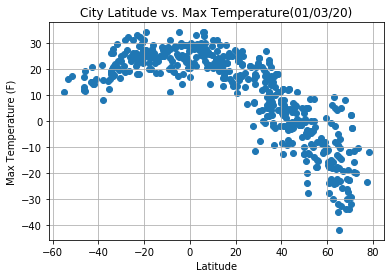

In [18]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature(01/03/20)")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("CityLatitude_vs_MaxTemperature.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

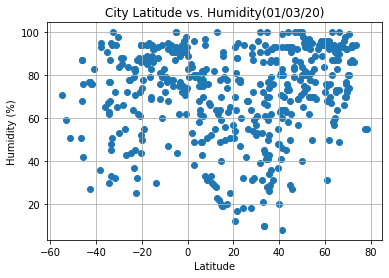

In [17]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity(01/03/20)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("CityLatitude_vs_Humidity.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

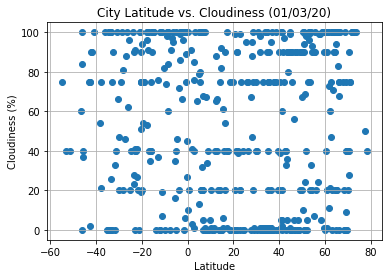

In [19]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (01/03/20)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("CityLatitude_vs_Cloudiness.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

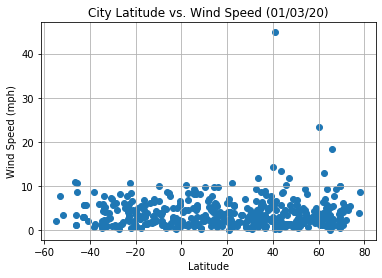

In [20]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (01/03/20)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("CityLatitude_vs_WindSpeed.png")

# Show plot
plt.show()

## Linear Regression

In [30]:
def LinearRegressionplot(x_values, y_values):

# Perform a linear regression on Max Temp vs. latitude
    (slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
# Get regression values
    regress_values = x_values * slope + intercept
# Create line equation string
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
# Create Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-" )

# Label plot and annotate the line equation
    plt.xlabel('Latitude')
    plt.ylabel(str(y_values.name))
    plt.annotate(line_eq,(0,0), fontsize=15,color="red")

# Print r square value
    print(f"The r-squared is: {rvalue}")

# Show plot
plt.show()

In [22]:
# Create Northern and Southern Hemisphere DataFrames
Northern_Hemisphere = weather_data.loc[weather_data['Lat'] > 0] 
Sorthern_Hemisphere = weather_data.loc[weather_data['Lat'] < 0] 

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8708742325886917


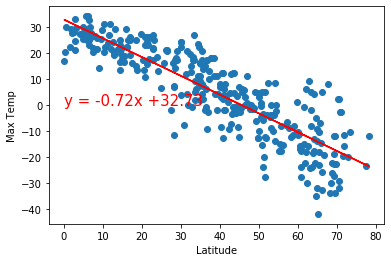

In [31]:
x_values = Northern_Hemisphere["Lat"]
y_values = Northern_Hemisphere["Max Temp"]
LinearRegressionplot(x_values, y_values)

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.5286863288999719


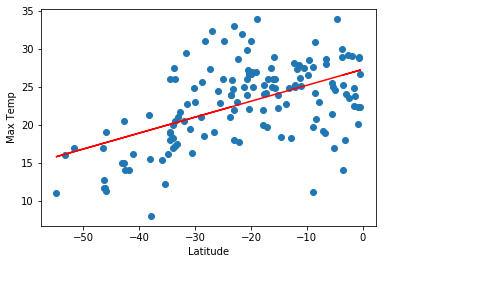

In [32]:
x_values = Sorthern_Hemisphere["Lat"]
y_values = Sorthern_Hemisphere["Max Temp"]
LinearRegressionplot(x_values, y_values)

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.3338115060287987


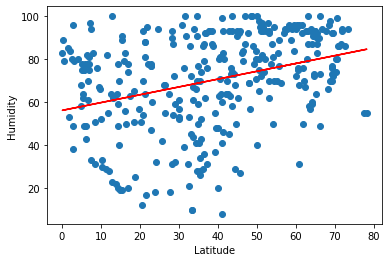

In [33]:
x_values = Northern_Hemisphere["Lat"]
y_values = Northern_Hemisphere["Humidity"]
LinearRegressionplot(x_values, y_values)

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.29068185962580206


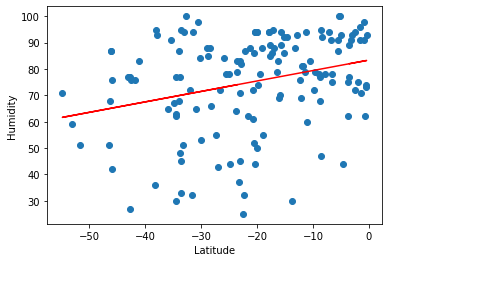

In [34]:
x_values = Sorthern_Hemisphere["Lat"]
y_values = Sorthern_Hemisphere["Humidity"]
LinearRegressionplot(x_values, y_values)

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.18086311374192596


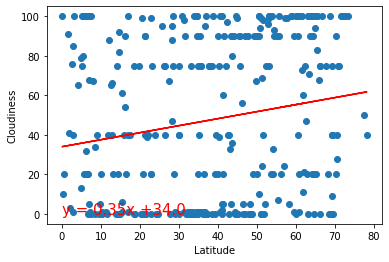

In [35]:
x_values = Northern_Hemisphere["Lat"]
y_values = Northern_Hemisphere["Cloudiness"]
LinearRegressionplot(x_values, y_values)

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.09870811762316342


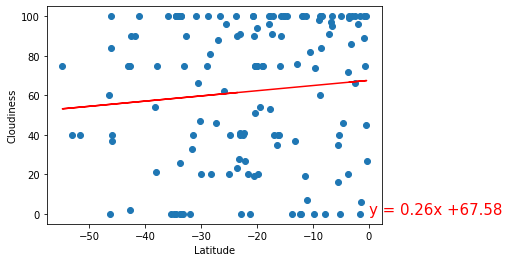

In [36]:
x_values = Sorthern_Hemisphere["Lat"]
y_values = Sorthern_Hemisphere["Cloudiness"]
LinearRegressionplot(x_values, y_values)

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.030407391912657074


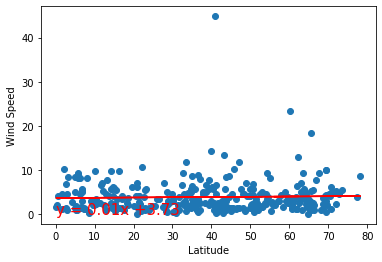

In [37]:
x_values = Northern_Hemisphere["Lat"]
y_values = Northern_Hemisphere["Wind Speed"]
LinearRegressionplot(x_values, y_values)

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.1551507620625725


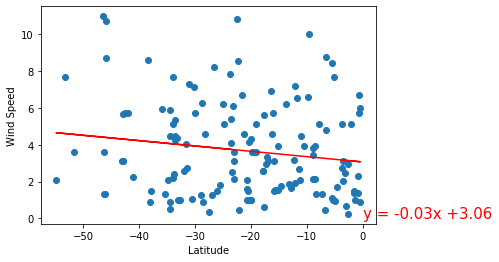

In [38]:
x_values = Sorthern_Hemisphere["Lat"]
y_values = Sorthern_Hemisphere["Wind Speed"]
LinearRegressionplot(x_values, y_values)

Observation 1: higher the latitude, lower the Temperature in Northern Hemisphere.

Observation 2: the cloudness does not show relationship with latitude.

Observation 3: the wind speed usually between 0 to 10 mph, some cities in Northern Hemisphere may occur higher wind speed. 